# Lecture 3 Spectral Accuracy

## Accuracy And Speed: Key To Success. 
##          -- https://cetking.com/accuracy-speed-key-success
##                   

We are ready to discuss the accuracy of spectral methods. As stated in Lecture 1, the typical convergence rate is $O(N^{-m})$ for every $m$ for functions that are smooth (fast!) and $O(c^N)$ $(0 < c < 1)$ for functions that are analytic (faster!). Such behavior is known as **spectral accuracy**.

[Table of Fourier Transform](https://ethz.ch/content/dam/ethz/special-interest/baug/ibk/structural-mechanics-dam/education/identmeth/fourier.pdf)

- First, a smooth function has a rapidly decaying transform. The reason is that a smooth function changes slowly, and since high wavenumbers correspond to rapidly oscillating waves, such a function contains little energy at high wavenumbers. 
- Second, if the Fourier transform of a function decays rapidly, then the errors introduced by discretization are small. The reason is that these errors are caused by aliasing of high wavenumbers to low wavenumbers.

**Theorem** Smoothness of a function and decay of its Fourier transform. 

Let $u\in L^2(\mathbb{R})$ have Fourier transform $\hat{u}$. 

(a)  If $u$ has $p - 1$ continuous derivatives in $L^2(\mathbb{R})$ for some $p \geq 0$ and a $p$th
derivative of bounded variation, then 
$$\hat{u}(k)=O ( |k|^{-p-1}), \quad \text{as } |k|\to \infty.$$

(b) If $u$ has infinitely many continuous derivatives in $L^2(\mathbb{R})$, then 
$$\hat{u}(k)=O ( |k|^{-m}), \quad \text{as } |k|\to \infty.$$
for every $m \geq 0$. The converse also holds.

(c) If there exist $a , c > 0$ such that $u$ can be extended to an analytic function in the complex strip $|\mathrm{Im} z| < a$ with $\|u(\cdot + iy)\| \leq c$ uniformly for all $y\in (-a,a)$, where $\|u(\cdot + iy)\| $ is the $L^2$ norm along the horizontal line $\mathrm{Im}z = y$, then $u_a \in L^2(\mathbb{R})$, where $u_a(k) = e^{a|k|}\hat{u}(k)$. The converse also holds.

(d) If u can be extended to an entire function (i.e., analytic throughout the complex plane) and there exists $a > 0$ such that $|u(z)| = o(e^{a|z|})$ as $|z|\to \infty$ for all complex values $z \in\mathbb{C}$, then $\hat{u}$ has compact support contained in $[-a, a]$; that is,
$$ \hat{u}(k)=0$$
for all $|k|>a$. The converse also holds.

(c) and (d) are known as Paley-Wiener theorems.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft, ifft


### Illustration of Theorem 1(a).

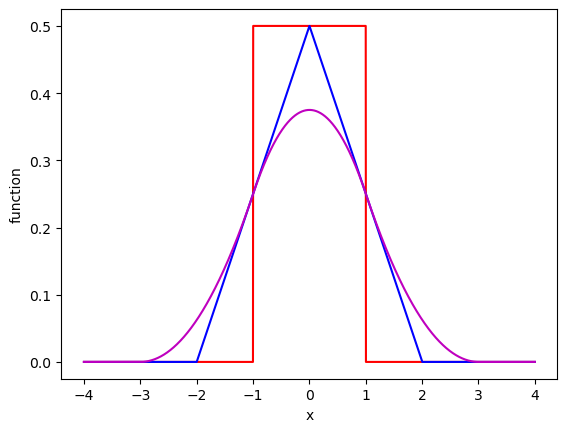

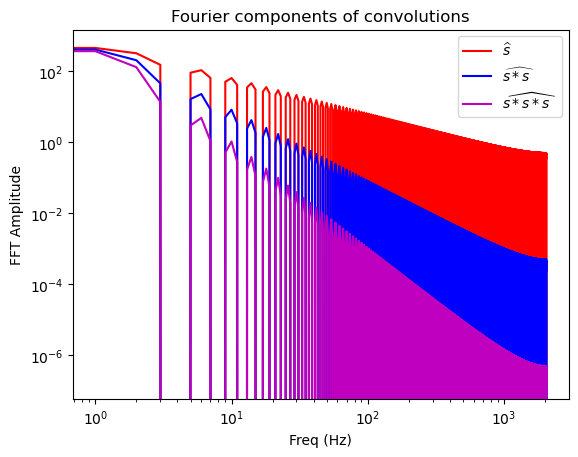

In [2]:
N = 4096
x0 = -4
x1 = 4
h = float(x1-x0)/N
x = np.linspace(x0,x1,N)

s = np.where(np.abs(x)<=1, 0.5, 0)
s2 = np.convolve(s,s,'same')*h
s3 = np.convolve(s,s2,'same')*h

plt.plot(x, s, 'r-')
plt.plot(x, s2, 'b-')
plt.plot(x, s3, 'm-')
plt.xlabel('x')
plt.ylabel('function')
plt.show()
plt.title('Convolutions of step function')

S = fft(s)
S2 = fft(s2)
S3 = fft(s3)

freq = np.arange(N//2)

plt.loglog(freq, np.abs(S[0:N//2]), 'r-')
plt.loglog(freq, np.abs(S2[0:N//2]), 'b-')
plt.loglog(freq, np.abs(S3[0:N//2]), 'm-')
plt.legend(['$\widehat{s}$', '$\widehat{s*s}$', '$\widehat{s*s*s}$'])
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')
plt.title('Fourier components of convolutions')
plt.show()


The Fourier transform for the convolutions of step funciton
$$ \hat{s}(k)= \frac{\sin k}{k}, \quad
    \widehat{s*s}(k) = \big(\frac{\sin k}{k}\big)^2, \quad
    \widehat{s*s*s}(k) = \big(\frac{\sin k}{k}\big)^3.
$$

convoltuion: $u*v(t) = \int_{\tau} u(\tau)v(t-\tau) d\tau$

FFT convolution: 
$$\hat{u}, \hat{v}$$ 

$$\widehat{u*v} = \hat{u}*\hat{v}$$

$$u*v=\mathcal{F}^{-1}(\widehat{u*v})$$


In [3]:
print('Time required for normal discrete convolution:')
%timeit np.convolve(s, s)
  
print('Time required for FFT convolution:')
%timeit signal.fftconvolve(s, s)



Time required for normal discrete convolution:
2.46 ms ± 49.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Time required for FFT convolution:
140 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Illustration of Theorem 1(d)
By reversing the roles of $\hat{s}$, $\widehat{s*s}$ , $\widehat{s*s*s}$ and $s$, $s * s$, $s* s*s$ in the above example, that is, by regarding the former as the functions and the latter as the transforms (apart from some unimportant constant factors), we obtain illustrations of Theorem l(d). The function $\hat{s}$, for example, satisfies $\hat{s}(k) = o(e^{|k|})$ as $|k| \to \infty$, and its Fourier transform, $2\pi s(x)$, has compact support $[-1, 1]$.


### Illustration of Theorem 1(c)

Consider the pair
$$ u(x) = \frac{\sigma}{x^2+\sigma^2}, \quad \hat{u}(k) = \pi e^{-\sigma|k|}$$

for any constant $\sigma > 0$. This function $u(x)$ is analytic throughout the complex plane except for poles at $\pm i \sigma$. Thus Theorem l(c) applies, and we may take any $a < \sigma$. (The condition $\|u(\cdot +iy)\|\leq c$ will fail if we take $a = \sigma$.) As predicted, the Fourier transform decays exponentially at the corresponding rate. By reversing the roles of $u$ and $\hat{u}$ in this example, we obtain a function satisfying condition (a) of the theorem with $p = 1$ whose transform decays at the predicted rate $O(|k|^{-2})$.


### Another illustration. 

For a final illustration let us consider that most familiar of all Fourier transform pairs,
$$ u(x) = e^{-x^2/2\sigma^2}, \quad \hat{u}(k) = \sigma \sqrt{\frac{\pi}{2}}e^{-\sigma^2k^2/2}$$

These functions fit between parts (c) and (d) of Theorem 1. A Gaussian pulse is "smoother" than analytic in a strip, but "less smooth" than entire with a growth condition at $\infty$; it is entire, but fails the growth condition since the exponential growth is quadratic rather than linear along rays other than the real axis. Correspondingly, its Fourier transform, another Gaussian pulse, decays faster than exponentially, since the exponent is squared, but does not have compact support.

# Theorem:  Accuracy of Fourier spectral differentiation.

Let $u \in L^2(\mathbb{R})$ have a $\nu$ th derivative ($\nu\geq 1$) of bounded variation, and let $w$ be the $\nu$ th **spectral derivative** of $u$ on the grid $h\mathbb{Z}$. The following estimates hold uniformly for all $x \in h\mathbb{Z}$.

(a) If $u$ has $p - 1$ continuous derivatives in $L^2(\mathbb{R})$ for some $p >\nu+1$ and a $p$ th derivative of bounded variation, then
$$ |w_j - u^{(\nu)}(x_j) | = O(h^{p-\nu})\quad \text{ as }h\to 0.$$

(b) If u has infinitely many continuous derivatives in $L^2(\mathbb{R})$, then
$$ |w_j - u^{(\nu)}(x_j) | = O(h^m)\quad \text{ as }h\to 0.$$
for every $m \geq 0$.

(c) If there exist $a , c > 0$ such that $u$ can be extended to an analytic function in the complex strip $|\mathrm{Im} z|<a$ with $\|u(\cdot +iy)\|\leq c $ uniformly for all $y\in (-a, a)$,then
$$ w_j - u^{(\nu)}(x_j)  = O(e^{-\pi(a-\epsilon)/h})\quad \text{ as }h\to 0.$$
for every $\epsilon >0$. $1/h\sim N$

(d) If u can be extended to an entire function and there exists $a > 0$ such
that for $z\in \mathbb{C}$ $|u(z)|=o(e^{a|z|})$ as $|z|\to \infty$, then, provided $h<\pi/a$,
$$w_j = u^{(\nu)}(x_j).$$    


The following Program 7 illustrates the various convergence rates we have discussed. The program computes the spectral derivatives of four periodic functions, 
- $|\sin x|^3$, 
- $\exp(-\sin^{-2}(x/2))$, 
- $1/(1 +\sin^2(x/2))$, 
- $\sin(10x)$. 

The first has a third derivative of bounded variation, the second is smooth but not analytic,
the third is analytic in a strip in the complex plane, and the fourth is band-limited. The $\infty$-norm of the error in the spectral derivative is calculated for various step sizes, and in Output 7 we see varying convergence rates as predicted by the theorem.

In [9]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import zeros,pi,inf,linspace,arange,tan,sin,cos,exp,abs,dot
from scipy.linalg import toeplitz,norm
from matplotlib.pyplot import figure,subplot,semilogy,title,xlabel,ylabel,axis

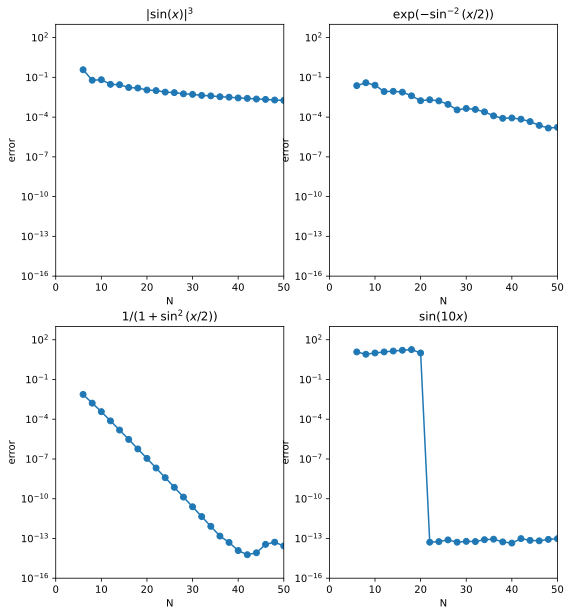

In [10]:
# Program 7
# # Set up grid and differentiation matrix:
Nmax = 50
E = zeros((4,Nmax//2-2))
for N in range(6,Nmax+1,2):
    h = 2.0*pi/N; x = h*linspace(1,N,N);
    col = zeros(N)
    col[1:] = 0.5*(-1.0)**arange(1,N)/tan(arange(1,N)*h/2.0)
    row = zeros(N)
    row[0] = col[0]
    row[1:] = col[N-1:0:-1]
    D = toeplitz(col,row)
    
    v = abs(sin(x))**3
    vprime = 3.0*sin(x)*cos(x)*abs(sin(x))
    E[0][N//2-3] = norm(dot(D,v)-vprime,inf)
    
    v = exp(-sin(x/2)**(-2))   # C-infinity
    vprime = 0.5*v*sin(x)/sin(x/2)**4
    E[1][N//2-3] = norm(dot(D,v)-vprime,inf)
    
    v = 1.0/(1.0+sin(x/2)**2)     # analytic in a strip
    vprime = -sin(x/2)*cos(x/2)*v**2
    E[2][N//2-3] = norm(dot(D,v)-vprime,inf)
    
    v = sin(10*x)
    vprime = 10*cos(10*x)   # band-limited
    E[3][N//2-3] = norm(dot(D,v)-vprime,inf)

titles = ["$|\sin(x)|^3$", "$\exp(-\sin^{-2}(x/2))$", \
          "$1/(1+\sin^2(x/2))$", "$\sin(10x)$"]
figure(figsize=(9,10))
for iplot in range(4):
    subplot(2,2,iplot+1)
    semilogy(arange(6,Nmax+1,2),E[iplot][:],'o-')
    title(titles[iplot])
    xlabel('N')
    ylabel('error')
    axis([0,Nmax,1.0e-16,1.0e3])

**Exercise 8** Compute the spectral differentiation of the step function $s(x)$ and its convolutions $s*s$, $s*s*s$, and 
$$u(x) = e^{-x^2/2\sigma^2}$$
and draw the error vs. $N$ plots.

# Spectral Accuracy in Action

# Program 8: Eigenvalues of harmonic oscillator $-u'' + x^2 u$ on $R$

Consider the problem of finding values of $\lambda$ such that
$$-u''+x^2u = \lambda u, \quad x\in \mathbb{R},$$
for some $u \neq 0$. This is the problem of a quantum harmonic oscillator, whose exact solution is well known. The eigenvalues are $\lambda = 1,3,5,...$, and the eigenfunctions $u$ are Hermite polynomials multiplied by decreasing exponentials, $e^{-x^2/2}H_n(x)$ (times an arbitrary constant). 

Since these solutions decay rapidly, for practical computations we can truncate the infinite spatial domain to the periodic interval $[-L, L]$, provided $L$ is sufficiently large. We set up a uniform grid $x_1$,...,$x_N$ extending across $[-L,L]$,let $v$ be the vector of approximations to $u$ at the grid points, and approximate the differential equation by the matrix equation 
$$
(-D_N^{(2)}+S)v = \lambda v
$$
where $D_N^{(2)}$ is the second order periodic differentiation matrix 
$$
D =  \left( {\begin{array}{ccccccccc}
     &  &  &  & \vdots &  &  &  &  \\
     &  &  \ddots &  & \frac12 \csc^2(\frac{3h}{2}) &  &  & & \\
     &  &  \ddots &  & -\frac12 \csc^2(\frac{2h}{2}) &  &  & & \\
     &  &  \ddots &  & \frac12 \csc^2(\frac{1h}{2}) &  &  & & \\
     &  &  &  & -\frac{\pi^2}{3h^2}-\frac{1}{6} &  &  & & \\
     &  &  &  & \frac12 \csc^2(\frac{1h}{2}) &  & \ddots &  & \\
     &  &  &  & -\frac12 \csc^2(\frac{2h}{2}) &  & \ddots &  & \\
     &  &  &  & \frac12 \csc^2(\frac{3h}{2}) &  & \ddots &  & \\
     &  &  &  & \vdots &  &  & & \\
  \end{array} } \right)
$$
rescaled to $[-L, L]$ instead of $[-\pi, \pi]$ and $S$ is the diagonal matrix 
$$S = \mathrm{diag}(x_1^2, \dots, x_N^2).$$

**Exercise 9**  Read Page 22-23 of Trefthen's book Spectral Methods in Matlab, SIAM, 2000, derive the formula of $D_N^{(2)}$. 

In [11]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import pi,arange,linspace,sin,zeros,diag,sort
from scipy.linalg import toeplitz
from numpy.linalg import eig

In [12]:
# Program 8
L = 8.0
for N in range(6,37,6):
    h = 2.0*pi/N; x = h*linspace(1,N,N); x = L*(x-pi)/pi
    col = zeros(N)
    col[0] = -pi**2/(3.0*h**2) - 1.0/6.0
    col[1:] = -0.5*(-1.0)**arange(1,N)/sin(0.5*h*arange(1,N))**2
    D2 = (pi/L)**2 * toeplitz(col)
    evals,evecs = eig(-D2 + diag(x**2))
    eigenvalues = sort(evals)
    print("N = %d" % N)
    for e in eigenvalues[0:4]:
        print("%24.15e" % e)

N = 6
   4.614729169954769e-01
   7.494134621050524e+00
   7.720916053006566e+00
   2.883248377834014e+01
N = 12
   9.781372812986074e-01
   3.171605320647183e+00
   4.455935291166794e+00
   8.924529058119930e+00
N = 18
   9.999700014993056e-01
   3.000644066795827e+00
   4.992595324407715e+00
   7.039571897981494e+00
N = 24
   9.999999976290449e-01
   3.000000098410864e+00
   4.999997965273288e+00
   7.000024998156541e+00
N = 30
   9.999999999999901e-01
   3.000000000000738e+00
   4.999999999975604e+00
   7.000000000508621e+00
N = 36
   1.000000000000004e+00
   2.999999999999978e+00
   5.000000000000012e+00
   7.000000000000017e+00


**Exercise 10** Write a program to investigate the accuracy of Program 8 as a function of $L$ and $N/L$. On a single plot with a log scale, the program should superimpose twelve curves of $|\lambda_{\rm computed} - \lambda_{\rm exact}|$, vs. $N/ L$ corresponding to $L = 3,5,7$, the lowest four eigenvalues $\lambda$, and $N = 4,6,8,. ..,60$. How large must $L$ and $N/L$ be for the four eigenvalues to be computed to ten-digit accuracy? For sufficiently large $L$, what is the shape of the convergence curve as a function of $N/L$? How does this match the results of this lecture and the smoothness of the eigenfunctions being discretized?


**Exercise 11** Consider the eigenvalue equation with $x^2$ changed to $x^4$. What happens to the eigenvalues? Calculate the first $20$ of them to 10-digit accuracy, providing good evidence that you have achieved this, and plot the results.